In [15]:
import pandas as pd

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
df=pd.read_csv('train.csv')


In [18]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [19]:
y_train=df['label']
x_train=df.drop(labels = ["label"], axis = 1)

In [22]:
y_train

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

In [24]:
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

NameError: name 'x_test' is not defined

In [ ]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [ ]:
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

In [17]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.1211 - accuracy: 0.1864 - val_loss: 1.9516 - val_accuracy: 0.2731
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0385 - accuracy: 0.2188 - val_loss: 1.9056 - val_accuracy: 0.2901
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0306 - accuracy: 0.2222 - val_loss: 1.9179 - val_accuracy: 0.2931
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0212 - accuracy: 0.2269 - val_loss: 1.9178 - val_accuracy: 0.2874
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0169 - accuracy: 0.2259 - val_loss: 1.9426 - val_accuracy: 0.2855
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0147 - accuracy: 0.2300 - val_loss: 1.9100 - val_accuracy: 0.2952
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0124 - accuracy: 0.2290 - val_loss: 1.8881 - val_accurac

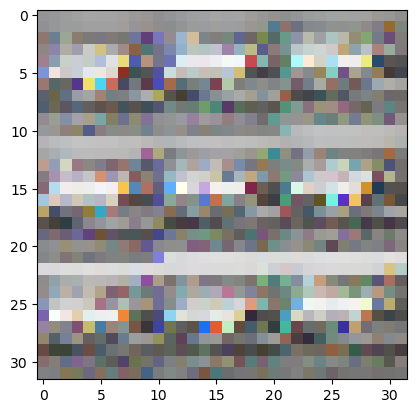

1563/1563 [==============================] - 2s 999us/step


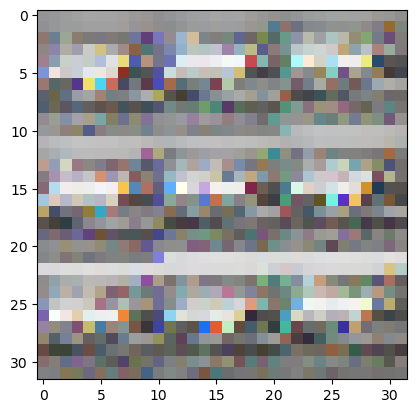

In [20]:
import random
import matplotlib.pyplot as plt
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

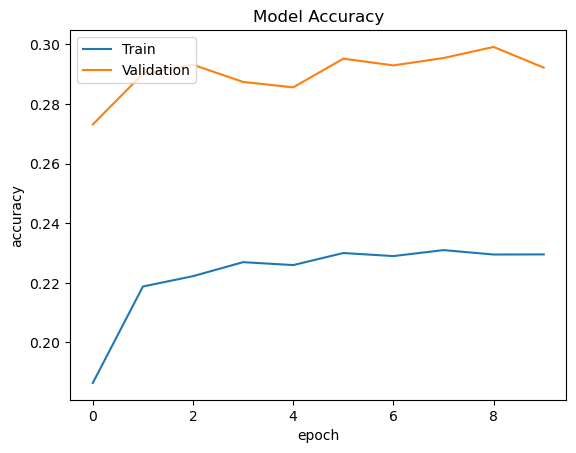

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = "upper left")
plt.show()

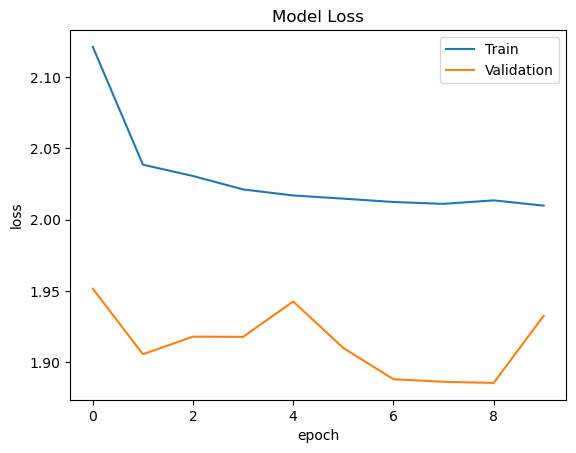

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = "upper right")
plt.show()